In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## 1. Data Exploration
'''I'm starting by loading the F1 dataset and understanding its structure. 
This will help me identify which features might be useful for predicting race outcomes.'''




df=pd.read_csv("f1races.csv")

In [3]:
df.head()

,year,round,circuitId,date,rainy,Turns,Length,driverId,constructorId,grid,...,laps,statusId,Weighted_Top_3_Probability,Weighted_Top_3_Prob_Length,position_previous_race,nro_cond_escuderia,raceId,points,prom_points_10,Top 3 Finish
0,2000,1,1,2000-03-12,0,14,5.278,2,20,15,...,56,12,0.087719,0.090909,8.0,2,158,0.0,9.4,0
1,2000,1,1,2000-03-12,0,14,5.278,14,1,2,...,11,5,0.208333,0.222222,20.0,2,158,0.0,47.6,0
2,2000,1,1,2000-03-12,0,14,5.278,15,17,6,...,35,5,0.048387,0.083333,20.0,2,158,0.0,8.5,0
3,2000,1,1,2000-03-12,0,14,5.278,18,3,21,...,46,5,0.160494,0.235294,20.0,2,158,0.0,1.2,0
4,2000,1,1,2000-03-12,0,14,5.278,21,22,9,...,58,1,0.076923,0.100000,11.0,1,158,2.0,4.5,0


In [4]:
df.describe()

,year,round,circuitId,rainy,Turns,Length,driverId,constructorId,grid,Driver Top 3 Finish Percentage (Last Year),...,laps,statusId,Weighted_Top_3_Probability,Weighted_Top_3_Prob_Length,position_previous_race,nro_cond_escuderia,raceId,points,prom_points_10,Top 3 Finish
count,9839.00000,9839.000000,9839.000000,9839.000000,9839.000000,9839.000000,9839.000000,9839.000000,9839.000000,9839.000000,...,9839.00000,9839.000000,9839.000000,9839.000000,9839.000000,9839.000000,9839.000000,9839.000000,9839.000000,9839.000000
mean,2012.17827,9.951113,19.548430,0.427584,15.887895,4.948020,343.004167,47.755361,10.920520,13.493258,...,52.07765,9.150727,0.142393,0.142393,11.262425,1.499746,621.663685,37.266338,36.344330,0.142393
std,7.01889,5.587132,21.051053,0.494753,2.925540,0.960061,393.348216,73.928043,6.194794,22.806132,...,19.27174,17.486304,0.173574,0.198297,6.387010,0.500025,435.834700,61.729143,53.276673,0.349470
min,2000.00000,1.000000,1.000000,0.000000,10.000000,2.313000,1.000000,1.000000,0.000000,0.000000,...,0.00000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2006.00000,5.000000,6.000000,0.000000,14.000000,4.361000,15.000000,4.000000,6.000000,0.000000,...,50.00000,1.000000,0.000000,0.000000,6.000000,1.000000,120.000000,1.000000,2.100000,0.000000
50%,2012.00000,10.000000,13.000000,0.000000,15.000000,5.148000,39.000000,9.000000,11.000000,0.000000,...,56.00000,4.000000,0.075000,0.000000,11.000000,1.000000,875.000000,11.000000,14.200000,0.000000
75%,2018.00000,15.000000,21.000000,1.000000,18.000000,5.543000,822.000000,23.000000,16.000000,16.666667,...,66.00000,11.000000,0.250000,0.250000,17.000000,2.000000,1002.000000,45.000000,46.000000,0.000000
max,2024.00000,22.000000,80.000000,1.000000,27.000000,7.004000,860.000000,215.000000,24.000000,100.000000,...,87.00000,141.000000,1.000000,1.000000,27.000000,2.000000,1132.000000,575.000000,451.500000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9839 entries, 0 to 9838
Data columns (total 34 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   year                                                            9839 non-null   int64  
 1   round                                                           9839 non-null   int64  
 2   circuitId                                                       9839 non-null   int64  
 3   date                                                            9839 non-null   object 
 4   rainy                                                           9839 non-null   int64  
 5   Turns                                                           9839 non-null   int64  
 6   Length                                                          9839 non-null   float64
 7   driverId                                           

In [6]:
df.isnull().sum()

year                                                              0
round                                                             0
circuitId                                                         0
date                                                              0
rainy                                                             0
Turns                                                             0
Length                                                            0
driverId                                                          0
constructorId                                                     0
grid                                                              0
Driver Top 3 Finish Percentage (Last Year)                        0
Constructor Top 3 Finish Percentage (Last Year)                   0
Driver Top 3 Finish Percentage (This Year till last race)         0
Constructor Top 3 Finish Percentage (This Year till last race)    0
Driver Avg position (Last Year)                 

<Axes: >

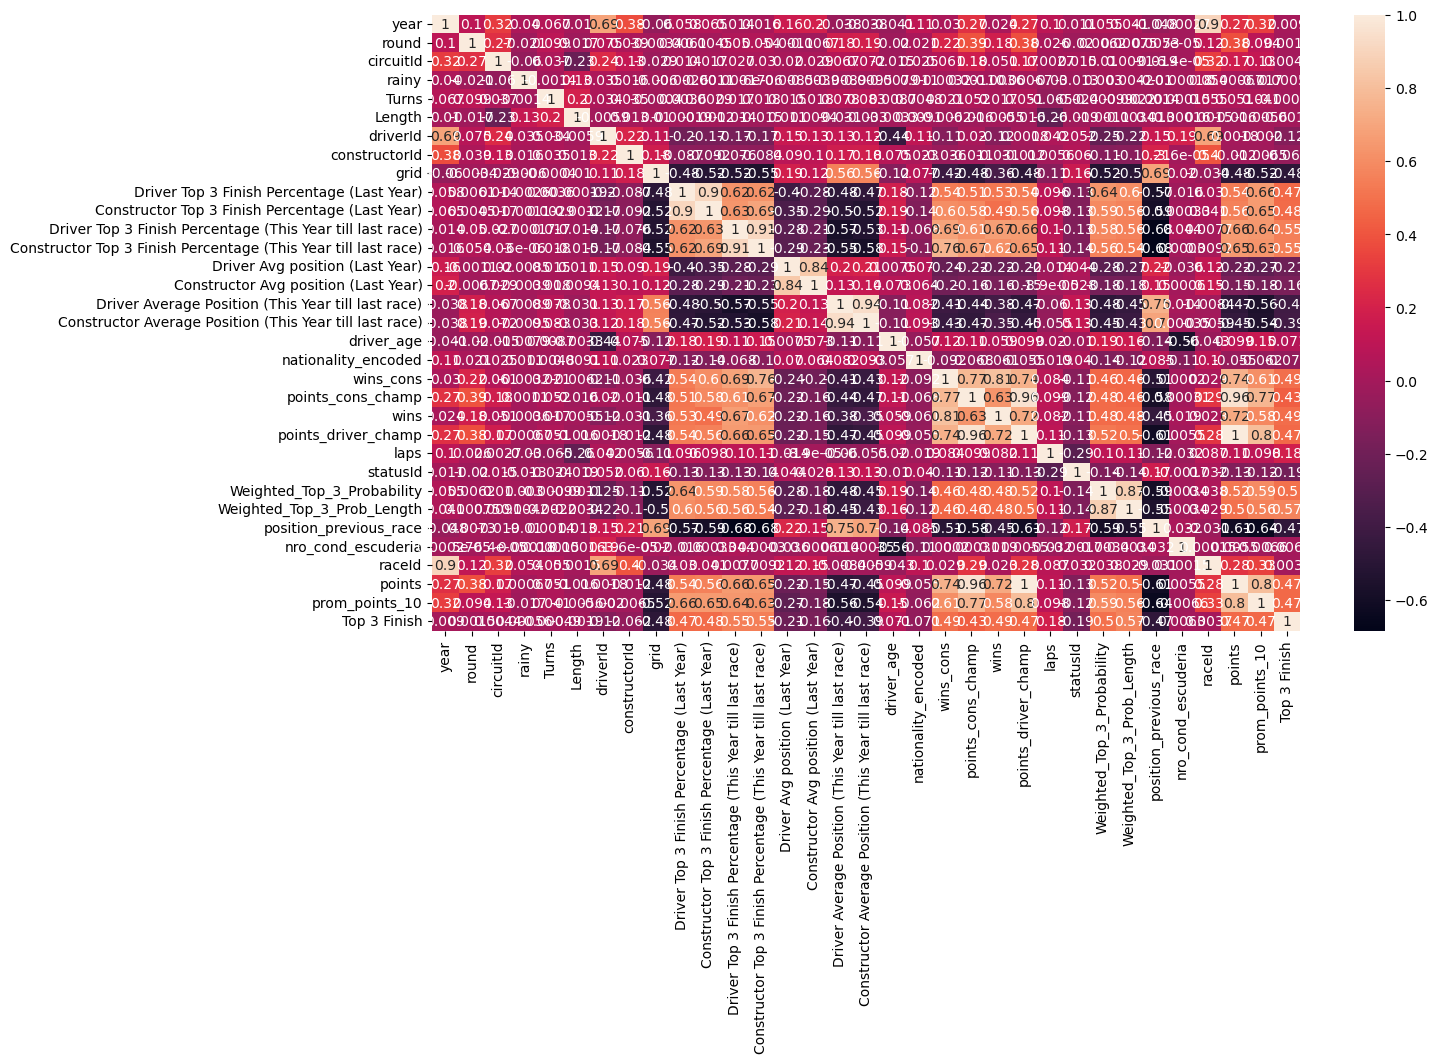

In [7]:
plt.figure(figsize=(14,8))
sns.heatmap(df.drop("date",axis=1).corr(),annot=True)

In [8]:
df.drop("date",axis=1).corr()["Top 3 Finish"].sort_values()

grid                                                             -0.480540
position_previous_race                                           -0.466989
Driver Average Position (This Year till last race)               -0.396114
Constructor Average Position (This Year till last race)          -0.391863
Driver Avg position (Last Year)                                  -0.213039
statusId                                                         -0.189442
Constructor Avg position (Last Year)                             -0.161286
driverId                                                         -0.124325
nationality_encoded                                              -0.070557
constructorId                                                    -0.062274
Length                                                           -0.001904
Turns                                                            -0.000491
rainy                                                             0.000561
round                    

<Axes: xlabel='Top 3 Finish', ylabel='wins'>

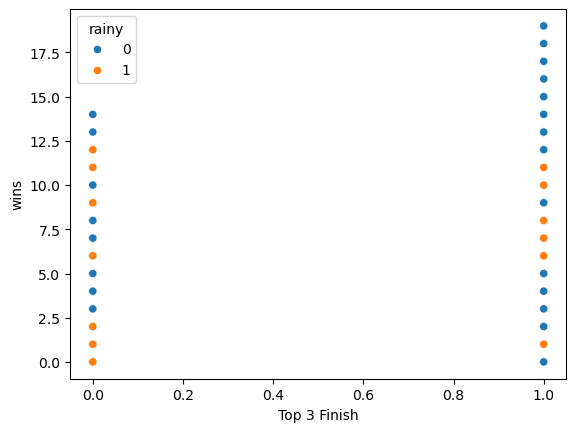

In [9]:
sns.scatterplot(data=df,x="Top 3 Finish",y="wins",hue='rainy')

In [10]:
df["Top 3 Finish"].value_counts(normalize=True)

Top 3 Finish
0    0.857607
1    0.142393
Name: proportion, dtype: float64

In [11]:
X=df.drop(["Top 3 Finish","date"],axis=1)
y=df["Top 3 Finish"]

In [12]:
from sklearn.model_selection import train_test_split


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [14]:
X_val, X_holdout, y_val, y_holdout = train_test_split(X_test, y_test, test_size=0.5, random_state=101)

In [15]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score,ConfusionMatrixDisplay

In [16]:
scaler=StandardScaler()

In [17]:
scaled_xtrain=scaler.fit_transform(X_train)
scaled_xval=scaler.transform(X_val)
scaled_xhold=scaler.transform(X_holdout)

In [18]:
smote=SMOTE(random_state=101)

In [19]:
bal_xtrain,bal_ytrain=smote.fit_resample(scaled_xtrain,y_train)

In [ ]:
###testing out multiple models

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

In [21]:
models = {
    'Logistic Regression': LogisticRegression(random_state=101),
    'Random Forest': RandomForestClassifier(random_state=101, n_estimators=100),
    'SVM': SVC(random_state=101, probability=True),
    'Naive Bayes': GaussianNB(),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=101),
    'Gradient Boosting': GradientBoostingClassifier(random_state=101),
}



In [22]:
results={}

for name,model in models.items():
    model.fit(bal_xtrain,bal_ytrain)
    y_pred=model.predict(X_val)
    y_pred_proba=model.predict_proba(X_val)[:1]

    acc=accuracy_score(y_val,y_pred)
    roc_auc=roc_auc_score(y_val,y_pred)
    results[name]={"Accuracy":acc,"roc_auc":roc_auc}


C:\Users\Supravati\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\Supravati\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\Supravati\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\Supravati\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\Supravati\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
C:\Users\Supravati\anaconda3\Lib\site-packages\sklearn\utils\valida

In [ ]:
results

In [23]:
pd.DataFrame(results)

,Logistic Regression,Random Forest,SVM,Naive Bayes,KNN,Decision Tree,Gradient Boosting
Accuracy,0.848577,0.848577,0.848577,0.866870,0.673780,0.848577,0.848577
roc_auc,0.500000,0.500000,0.500000,0.645867,0.791243,0.500000,0.500000


In [ ]:
#I've chosen to go with knn

In [27]:
#gridsearch
from sklearn.model_selection import GridSearchCV

In [28]:
param_grid = {
    'n_neighbors': range(3, 31, 2),  # Odd numbers from 3-29
    'weights': ['uniform', 'distance'],  # Equal vs distance-weighted
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  # Distance algorithms
    'p': [1, 2],  # Manhattan (1) vs Euclidean (2) distance
    'metric': ['euclidean', 'manhattan', 'chebyshev']  # Distance metrics
}

In [29]:
model=KNeighborsClassifier()

In [32]:
grid=GridSearchCV(model,param_grid,cv=5,scoring='roc_auc',n_jobs=-1)

In [33]:
grid.fit(bal_xtrain,bal_ytrain)
print("done")

done


In [34]:
grid.best_params_

{'algorithm': 'auto',
 'metric': 'manhattan',
 'n_neighbors': 13,
 'p': 1,
 'weights': 'distance'}

In [35]:
grid.best_score_

np.float64(0.9774706298133286)

In [37]:
model=KNeighborsClassifier(n_neighbors=13,p=1,weights='distance',metric='manhattan',algorithm='auto')

In [38]:
y_pred=model.predict(X_holdout)

NotFittedError: This KNeighborsClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [39]:
model.fit(bal_xtrain,bal_ytrain)

KNeighborsClassifier(metric='manhattan', n_neighbors=13, p=1,
                     weights='distance')

In [41]:
y_pred=model.predict(X_holdout)

C:\Users\Supravati\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


In [42]:
roc_auc_score(y_holdout,y_pred)

np.float64(0.8260670981308007)

In [44]:
print(classification_report(y_holdout,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.72      0.83       847
           1       0.35      0.93      0.51       137

    accuracy                           0.75       984
   macro avg       0.67      0.83      0.67       984
weighted avg       0.90      0.75      0.79       984



In [45]:
#final model is being made in file finalmodel


In [46]:
y_pred=model.predict(X)

C:\Users\Supravati\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


In [48]:
roc_auc_score(y,y_pred)

np.float64(0.8344090725836809)